# Leveraging Analytics to Drive Growth in the Supply Chain of a Retail Company

Supply chain analytics is a valuable part of data-driven decision-making in various industries such as manufacturing, retail, healthcare, and logistics. It involves collecting, analyzing, and interpreting data related to the movement of products and services from suppliers to customers. In this notebook, we will explore how analytics can be leveraged to drive growth in the supply chain of a retail company, specifically focusing on makeup products.

## Introduction and Context

In the competitive landscape of the retail industry, efficient supply chain management is crucial. For a retail company dealing with makeup products, the ability to optimize inventory, reduce costs, and enhance customer satisfaction can significantly impact the bottom line. This notebook aims to provide a comprehensive analysis of the supply chain using the given dataset to uncover actionable insights and make informed decisions.

### Dataset Features

The dataset includes a variety of features that capture different aspects of the supply chain:

- **Product Type**: Categories of makeup products.
- **SKU**: Stock Keeping Unit, a unique identifier for each product.
- **Price**: Retail price of the products.
- **Availability**: Current stock status.
- **Number of Products Sold**: Sales data.
- **Revenue Generated**: Financial performance.
- **Customer Demographics**: Information about the customers.
- **Stock Levels**: Inventory data.
- **Lead Times**: Time taken from order to delivery.
- **Order Quantities**: Quantity of products ordered.
- **Shipping Times**: Duration of shipping.
- **Shipping Carriers**: Companies handling the shipping.
- **Shipping Costs**: Expenses related to shipping.
- **Supplier Name**: Names of suppliers.
- **Location**: Geographical location of suppliers and customers.
- **Production Volumes**: Manufacturing data.
- **Manufacturing Lead Time**: Time taken to produce goods.
- **Manufacturing Costs**: Costs associated with production.
- **Inspection Results**: Quality check data.
- **Defect Rates**: Frequency of defective products.
- **Transportation Modes**: Methods of transportation used.
- **Routes**: Paths taken for transportation.
- **Costs**: Various cost elements in the supply chain.

## Problem Statement

**"How can we optimize inventory management and reduce costs while improving customer satisfaction in the supply chain?"**

## Objectives

### 1. Inventory Optimization
- **Analyze stock levels, lead times, and order quantities** to determine optimal inventory levels.
- **Identify patterns in product demand** based on historical sales data to forecast future inventory needs.

### 2. Cost Reduction
- **Examine shipping times, carriers, and costs** to identify the most cost-effective shipping strategies.
- **Assess manufacturing and transportation costs** to find potential areas for cost savings.

### 3. Customer Satisfaction
- **Study customer demographics and purchase behavior** to tailor inventory to meet customer preferences.
- **Improve lead times and availability** to ensure products are in stock when customers need them.

### 4. Supply Chain Efficiency
- **Evaluate supplier performance**, including lead times and defect rates, to select the best suppliers.
- **Optimize transportation modes and routes** to reduce shipping times and costs.

## Analysis Approach

### Descriptive Analytics
- **Provide a current state overview** of inventory levels, sales, revenue, and costs.
- **Segment customers** based on demographics and purchasing behavior.

### Predictive Analytics
- **Forecast future demand** for products using historical sales data and customer behavior patterns.
- **Predict lead times and potential delays** in the supply chain.

### Prescriptive Analytics
- **Recommend optimal stock levels and reorder points** to prevent stockouts and overstock situations.
- **Suggest cost-effective shipping carriers and routes** to minimize shipping costs and times.
- **Propose supplier selection criteria** based on historical performance data.

## Key Metrics to Track

- Inventory Turnover Ratio
- Stockout Rate
- Order Fulfillment Time
- Shipping Cost per Unit
- Manufacturing Cost per Unit
- Defect Rate
- Customer Satisfaction Score
- Revenue Growth Rate

**Conclusion**

By addressing these objectives through detailed data analysis, our goal is to create a more efficient and cost-effective supply chain that meets customer demand promptly and maintains high customer satisfaction. This notebook will guide you through the process of leveraging analytics to drive growth and efficiency in the supply chain of a retail company dealing with makeup products.

In [164]:
!kaggle datasets download -d harshsingh2209/supply-chain-analysis

Dataset URL: https://www.kaggle.com/datasets/harshsingh2209/supply-chain-analysis
License(s): CC0-1.0
supply-chain-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip supply-chain-analysis.zip

Archive:  supply-chain-analysis.zip
  inflating: supply_chain_data.csv   


In [1]:
!pip install -r requirements.txt --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['font.size'] = 14
import sqlite3

In [3]:
df =  pd.read_csv('/Users/dakshbhatnagar/Downloads/supply_chain/supply_chain_data.csv')
df.columns =  [i.replace(" ", "") for i in df.columns]
df.head()

,Producttype,SKU,Price,Availability,Numberofproductssold,Revenuegenerated,Customerdemographics,Stocklevels,Leadtimes,Orderquantities,...,Location,Leadtime,Productionvolumes,Manufacturingleadtime,Manufacturingcosts,Inspectionresults,Defectrates,Transportationmodes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.shape

(100, 24)

In [5]:
df.dtypes

Producttype               object
SKU                       object
Price                    float64
Availability               int64
Numberofproductssold       int64
Revenuegenerated         float64
Customerdemographics      object
Stocklevels                int64
Leadtimes                  int64
Orderquantities            int64
Shippingtimes              int64
Shippingcarriers          object
Shippingcosts            float64
Suppliername              object
Location                  object
Leadtime                   int64
Productionvolumes          int64
Manufacturingleadtime      int64
Manufacturingcosts       float64
Inspectionresults         object
Defectrates              float64
Transportationmodes       object
Routes                    object
Costs                    float64
dtype: object

In [6]:
conn =  sqlite3.connect('supply_chain.db')
cursor =  conn.cursor()
df.to_sql('data', conn, if_exists='replace', index=False)

100

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Producttype            100 non-null    object 
 1   SKU                    100 non-null    object 
 2   Price                  100 non-null    float64
 3   Availability           100 non-null    int64  
 4   Numberofproductssold   100 non-null    int64  
 5   Revenuegenerated       100 non-null    float64
 6   Customerdemographics   100 non-null    object 
 7   Stocklevels            100 non-null    int64  
 8   Leadtimes              100 non-null    int64  
 9   Orderquantities        100 non-null    int64  
 10  Shippingtimes          100 non-null    int64  
 11  Shippingcarriers       100 non-null    object 
 12  Shippingcosts          100 non-null    float64
 13  Suppliername           100 non-null    object 
 14  Location               100 non-null    object 
 15  Leadtim

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Numberofproductssold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenuegenerated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stocklevels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Leadtimes,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Orderquantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shippingtimes,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shippingcosts,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Leadtime,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


In [9]:
overall = sum(df['Stocklevels']/2)/len(df)
print(f"The Overall Inventory Turnover Ratio is {overall}")

The Overall Inventory Turnover Ratio is 23.885


Let's take a look at the Inventory Ratio city Wise

In [11]:
query = '''
with cte as (select *, Stocklevels / 2.0 as AvgInventory from data)

select Location, sum(Numberofproductssold * Orderquantities) / AvgInventory  as InventoryTurnOverRatio 
        from cte group by Location order by 2 desc
'''
temp = pd.read_sql_query(query, conn)
temp = temp.set_index('Location')
temp.reset_index()

,Location,InventoryTurnOverRatio
0,Delhi,188288.000000
1,Chennai,61817.142857
2,Kolkata,55594.086957
3,Mumbai,17715.448276
4,Bangalore,5007.888889


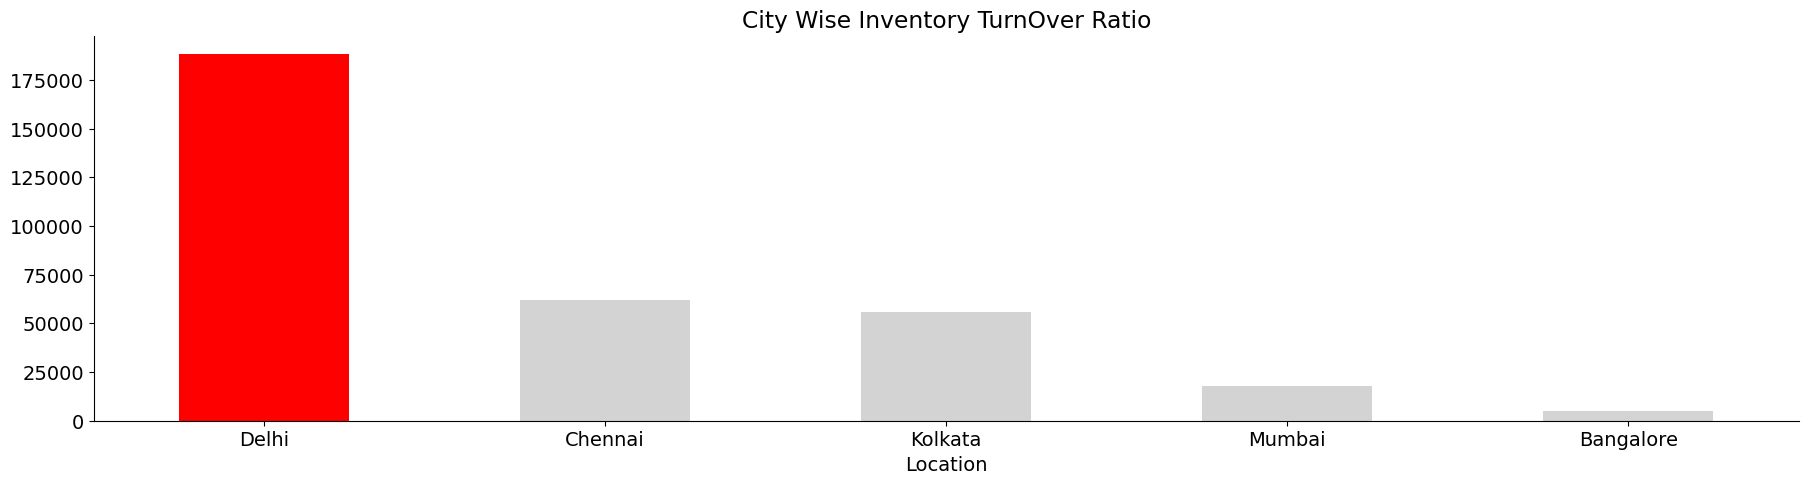

In [12]:
colors = ['lightgray'] *len(temp)
colors[0] = 'red'
temp['InventoryTurnOverRatio'].plot(kind='bar', color=colors)
plt.title('City Wise Inventory TurnOver Ratio')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=None)
plt.show()

**INSIGHTS**

- Delhi has the highest Inventory Ratio however Bangalore has the lowest Inventory Turnover Ratio. This means Delhi needs to ensure the stock is moving out quick from the godown. 

- *P.s Lower the Inventory Turnover Ratio, the better*

In [13]:
query = '''
with cte as (select *, Stocklevels / 2.0 as AvgInventory from data)

select Location, Suppliername, 
        sum(Numberofproductssold * Orderquantities) / AvgInventory  as InventoryTurnOverRatio 
        from cte 
        group by Location, Suppliername order by 2 desc
'''
temp = pd.read_sql_query(query, conn)
suppliers =  temp['Suppliername'].unique().tolist()

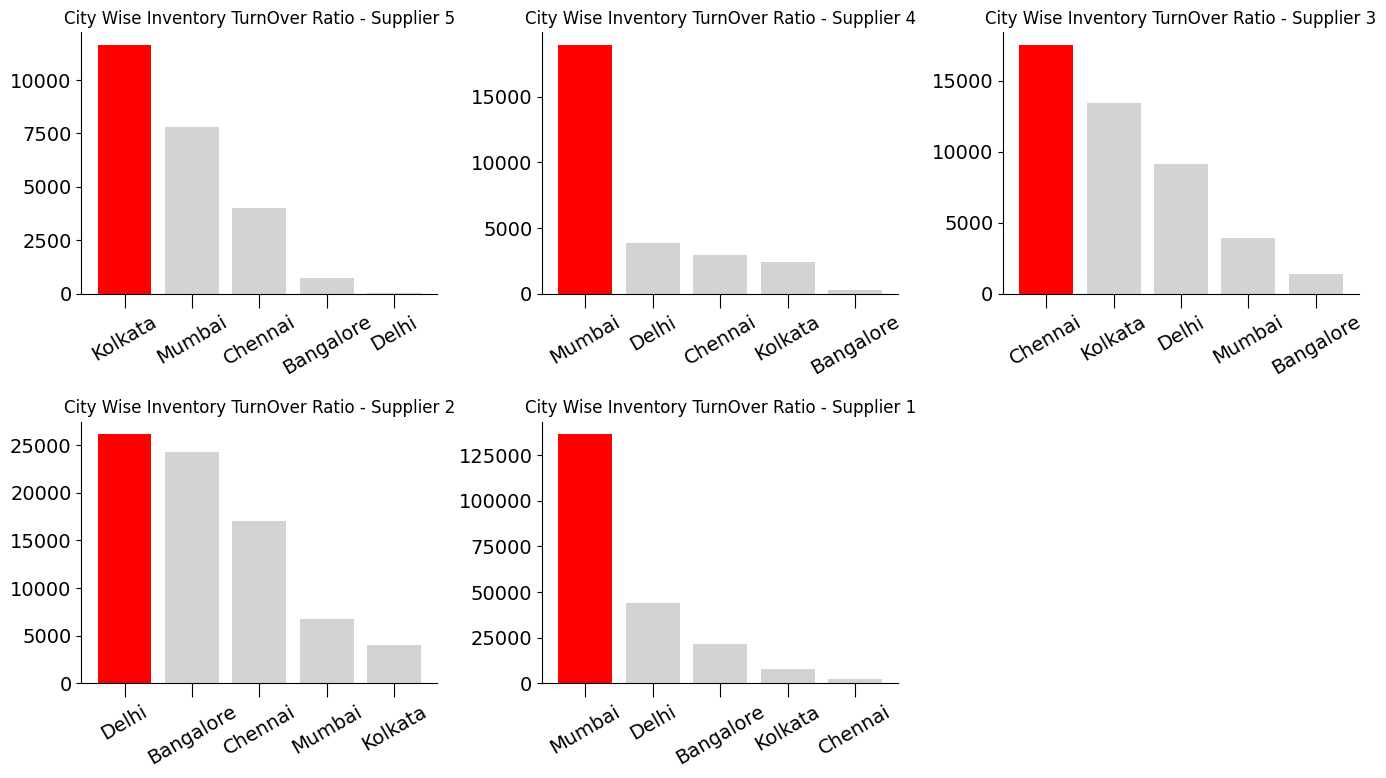

In [14]:
# Create a figure and axis for subplots with 3 columns
num_cols = 3
num_rows = (len(suppliers) + 2) // num_cols  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

# Iterate over suppliers and plot in subplots
for idx, supplier in enumerate(suppliers):
    if supplier:
        sup_df = temp[temp['Suppliername'] == supplier].sort_values('InventoryTurnOverRatio', ascending=False)
        colors = ['lightgray'] * len(sup_df)
        colors[0] = 'red'
        
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        ax.bar(sup_df['Location'], sup_df['InventoryTurnOverRatio'], color=colors)
        ax.set_title(f'City Wise Inventory TurnOver Ratio - {supplier}', fontsize=12)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', rotation=30, size=10)
if len(suppliers) < num_rows * num_cols:
    for i in range(len(suppliers), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])  

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**INSIGHT**

- In Mumbai, Supplier 1 and Supplier 4 has the highest Inventory turnover ratio which means they are not able to push the stock out of the godown as quickly as expected.

In [15]:
defectrate = round(df['Defectrates'].mean(),2)
print('The defect rate on an avg is {}'.format(defectrate))

The defect rate on an avg is 2.28


In [16]:
query = '''
with cte as (select Producttype, Location, round(avg(Defectrates),2) as Avg_DefectRate 
        from data group by Producttype, Location),

cte_2 as (select *, row_number() over(partition by Producttype 
            order by Avg_DefectRate desc) as rn from cte) 

select Producttype, Location, Avg_DefectRate from cte_2 where rn = 1
'''
temp = pd.read_sql_query(query, conn)
temp

,Producttype,Location,Avg_DefectRate
0,cosmetics,Delhi,2.20
1,haircare,Chennai,3.32
2,skincare,Chennai,2.58


**INSIGHTS**

-  In Delhi, cosmetics has the higehst avg defect rate however in Chennai in haircare and skincare has the highest defect rate

In [17]:
query = '''
with cte as (select Suppliername, SKU, round(avg(Defectrates),2) as Avg_DefectRate 
        from data where Location ='Chennai' group by Suppliername, SKU),

cte_2 as (select *, row_number() over(partition by SupplierName
            order by Avg_DefectRate desc) as rn from cte) 

select Suppliername, SKU, Avg_DefectRate from cte_2 where rn = 1
'''
temp = pd.read_sql_query(query, conn)
temp

,Suppliername,SKU,Avg_DefectRate
0,Supplier 1,SKU20,4.23
1,Supplier 2,SKU9,3.84
2,Supplier 3,SKU87,3.69
3,Supplier 4,SKU73,4.62
4,Supplier 5,SKU84,4.84


### Insights:

- Based on the table above, these SKUs are associated with suppliers that have the highest average defect rates.
- Engaging with them could provide insights into the challenges they face, particularly in Chennai, where two Product Types show the highest average defect rates.

In [24]:
query = '''
select Location, Shippingcarriers, sum(Shippingcosts) as TotalShippingCost, 
            sum(Numberofproductssold) as QtySold,
            sum(Shippingcosts)/sum(Numberofproductssold) as ShipCostPerUnit 
            from data group by Location, Shippingcarriers
            order by ShipCostPerUnit desc
'''
temp = pd.read_sql_query(query, conn)
temp.groupby('Location')['ShipCostPerUnit'].max().to_frame().reset_index()

,Location,ShipCostPerUnit
0,Bangalore,0.047438
1,Chennai,0.015603
2,Delhi,0.012465
3,Kolkata,0.015879
4,Mumbai,0.021722


**INSIGHT**

- Bangalore has the highest Shipping Cost per unit while Mumbai has the lowest Shipping Cost per unit

In [29]:
temp.groupby('Shippingcarriers')['ShipCostPerUnit'].max().to_frame().reset_index()

,Shippingcarriers,ShipCostPerUnit
0,Carrier A,0.019781
1,Carrier B,0.015879
2,Carrier C,0.047438


**INSIGHT**

- Carrier A has the highest Shipping Cost per unit while Carrier C has the lowest Shipping Cost per unit

In [35]:
query = '''
with cte as (
select Location, Shippingcarriers, sum(Shippingcosts) as TotalShippingCost, 
            sum(Numberofproductssold) as QtySold,
            sum(Shippingcosts)/sum(Numberofproductssold) as ShipCostPerUnit 
            from data group by Location, Shippingcarriers
            order by ShipCostPerUnit desc),
max_cte as (select *, max(ShipCostPerUnit) over(partition by Location order by ShipCostPerUnit rows between unbounded preceding and unbounded following) 
        as MaxCost from cte)

select * from max_cte where ShipCostPerUnit =  MaxCost
'''
pd.read_sql_query(query, conn)


,Location,Shippingcarriers,TotalShippingCost,QtySold,ShipCostPerUnit,MaxCost
0,Bangalore,Carrier C,17.267540,364,0.047438,0.047438
1,Chennai,Carrier C,29.006373,1859,0.015603,0.015603
2,Delhi,Carrier C,19.956614,1601,0.012465,0.012465
3,Kolkata,Carrier B,66.088898,4162,0.015879,0.015879
4,Mumbai,Carrier C,45.855507,2111,0.021722,0.021722


**INSIGHT**

- Carrier C seems to be having the highest shipping cost per unit across 4 cities which are Bangalore, Chennai, Delhi and Mumbai
- In Kolkata, Carrier B seems to be the carrier with the highest shipping cost per unit.

In [37]:
query = '''
with cte as (
select Location, Shippingcarriers, sum(Manufacturingcosts) as Manufacturingcost, 
            sum(Numberofproductssold) as QtySold,
            sum(Manufacturingcosts)/sum(Numberofproductssold) as CostPerUnit 
            from data group by Location, Shippingcarriers
            order by CostPerUnit desc),
max_cte as (select *, max(CostPerUnit) over(partition by Location order by CostPerUnit rows between unbounded preceding and unbounded following) 
        as MaxCost from cte)

select * from max_cte where CostPerUnit =  MaxCost
'''
pd.read_sql_query(query, conn)


,Location,Shippingcarriers,Manufacturingcost,QtySold,CostPerUnit,MaxCost
0,Bangalore,Carrier C,136.805180,364,0.375838,0.375838
1,Chennai,Carrier C,302.122116,1859,0.162519,0.162519
2,Delhi,Carrier A,313.195731,4005,0.078201,0.078201
3,Kolkata,Carrier C,436.797018,4194,0.104148,0.104148
4,Mumbai,Carrier A,172.032122,1871,0.091947,0.091947


**INSIGHT**

- Carrier C seems to be having the highest manufacturing cost per unit across 4 cities which are Bangalore, Chennai, Delhi and Mumbai
- In Kolkata, Carrier A seems to be the carrier with the highest manufacturing cost per unit.

In [39]:
query = '''
with cte as (
select Location, Suppliername, sum(Manufacturingcosts) as Manufacturingcost, 
            sum(Numberofproductssold) as QtySold,
            sum(Manufacturingcosts)/sum(Numberofproductssold) as CostPerUnit 
            from data group by Location, Suppliername
            order by CostPerUnit desc),
max_cte as (select *, max(CostPerUnit) over(partition by Location order by CostPerUnit rows between unbounded preceding and unbounded following) 
        as MaxCost from cte)

select * from max_cte where CostPerUnit =  MaxCost
'''
pd.read_sql_query(query, conn)


,Location,Suppliername,Manufacturingcost,QtySold,CostPerUnit,MaxCost
0,Bangalore,Supplier 5,208.442199,558,0.373552,0.373552
1,Chennai,Supplier 4,260.209276,1232,0.211209,0.211209
2,Delhi,Supplier 5,14.147815,99,0.142907,0.142907
3,Kolkata,Supplier 4,368.687562,2317,0.159123,0.159123
4,Mumbai,Supplier 4,223.291927,1264,0.176655,0.176655


**INSIGHT**

- Supplier 5 seems to be having the highest manufacturing cost per unit in 2 cities which are Bangalore and Delhi
- Supplier 4 seems to be the supplier with the highest manufacturing cost per unit in Chennai, Kolkata and Mumbai.

**Manufacturing Lead Time**

Manufacturing lead time in the context of supply chain refers to the total time required to manufacture a product from the initiation of the production process to its completion. This includes the time taken for actual manufacturing, processing, and assembly of the product. It is a critical factor in supply chain management as it directly impacts production scheduling, inventory levels, and overall operational efficiency. Efficient management of manufacturing lead time is essential for meeting customer demand, optimizing production processes, and minimizing costs.

In [105]:
temp = df.groupby('Producttype')[['Revenuegenerated', 'Manufacturingleadtime']].agg('sum', 'mean').reset_index()
temp['Ratio'] = (temp['Revenuegenerated'] / temp['Manufacturingleadtime']).apply(lambda x : round(x,2))
temp = temp.sort_values('Ratio', ascending=False)
temp

,Producttype,Revenuegenerated,Manufacturingleadtime,Ratio
0,cosmetics,161521.265999,346,466.82
2,skincare,241628.162133,551,438.53
1,haircare,174455.390605,580,300.79


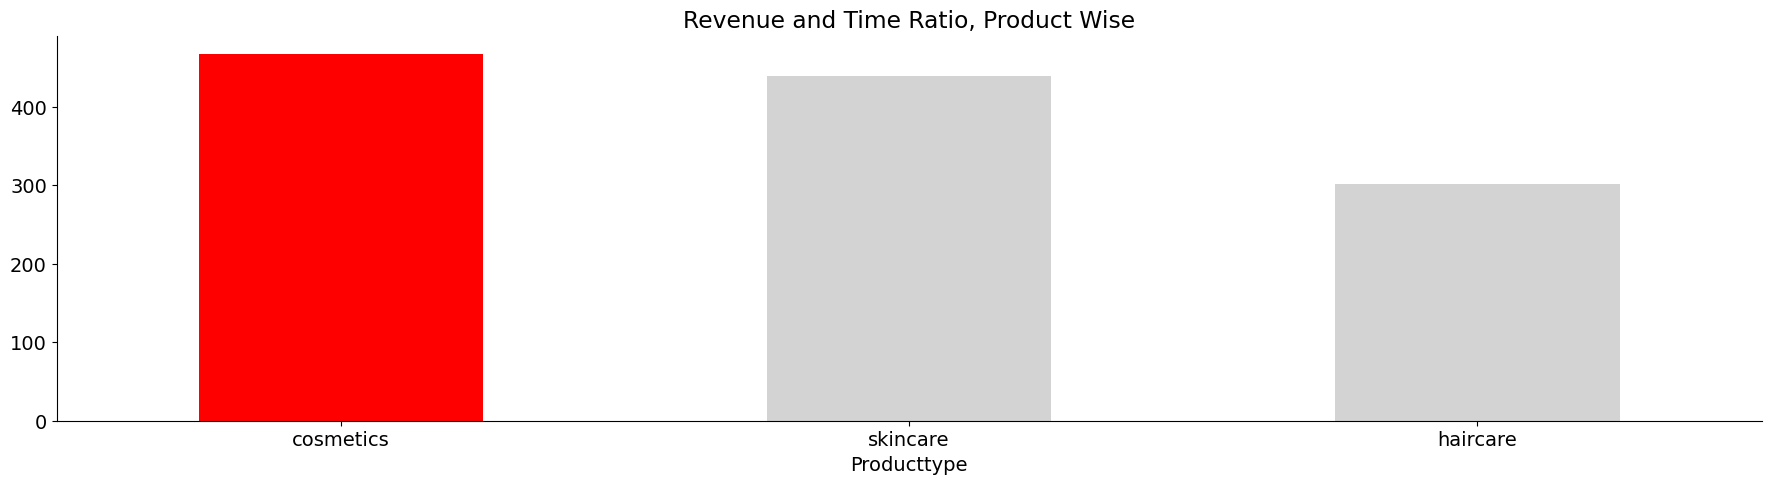

In [106]:
temp.set_index('Producttype')['Ratio'].plot(kind ='bar', color=['red', 'lightgray', 'lightgray'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Revenue and Time Ratio, Product Wise')
plt.xticks(rotation=0)
plt.show()

**INSIGHT**

- The above chart suggests that cosmetics yields less revenue as compared to the amount of time it goes into manufacturing the product.
- This could potentially mean looking at the manufacturing processes that we currently have in process or may be boost marketing efforts to help the revenue generated by cosmetics products.

**AVERAGE LEAD TIME**

Lead time is the amount of time that elapses between the initiation of a process and its completion. In the context of inventory management and supply chain, lead time can refer to several specific periods, including:

1. **Order Lead Time**: The time taken from placing an order with a supplier to the time the order is received.
2. **Production Lead Time**: The time required to manufacture a product from the start of production to its completion.
3. **Delivery Lead Time**: The time taken for a product to be delivered from the supplier to the final destination (e.g., a warehouse or customer).
4. **Procurement Lead Time**: The time required to obtain raw materials or components from a supplier until they are available for production.

Lead time is crucial in inventory management because it affects stock levels, reorder points, and overall supply chain efficiency. Accurate lead time calculations help ensure that inventory is replenished in a timely manner, minimizing the risk of stockouts or overstocking, which in turn helps in maintaining customer satisfaction.

**Importance of Lead Time**
- **Inventory Control**: Knowing the lead time helps in determining when to reorder stock to avoid shortages.
- **Customer Satisfaction**: Shorter lead times generally improve customer satisfaction by reducing wait times for products.
- **Cost Management**: Understanding lead times can help optimize order quantities and reduce holding costs.
- **Supply Chain Efficiency**: Identifying and reducing lead times can streamline supply chain operations, making them more responsive and flexible.

**Lead Time Calculation Example**
In a typical e-commerce scenario, if you place an order for a product on July 1st, and it gets delivered on July 10th, the lead time for this order would be 9 days.

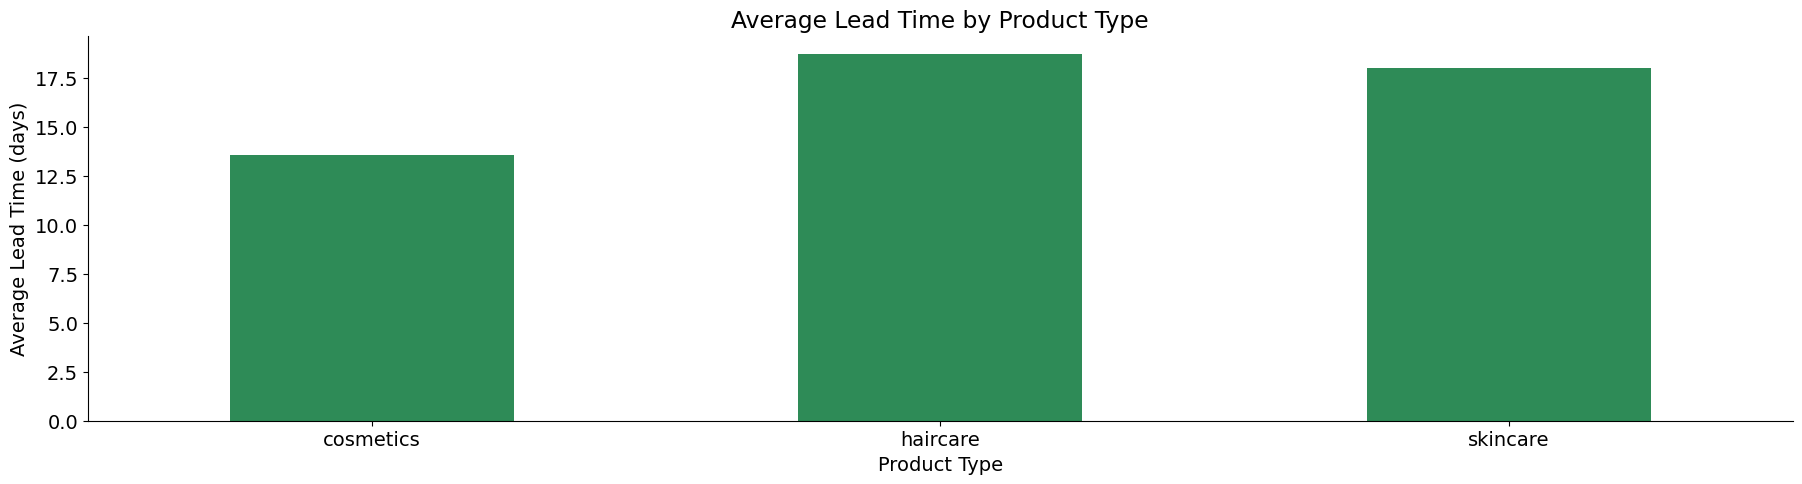

In [125]:
# Calculate average lead time by product type
average_lead_time = df.groupby('Producttype')['Leadtime'].mean()

# Plot average lead time by product type
average_lead_time.plot(kind='bar', color='seagreen')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Average Lead Time by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=0)
plt.show()

In [129]:
df.columns

Index(['Producttype', 'SKU', 'Price', 'Availability', 'Numberofproductssold',
       'Revenuegenerated', 'Customerdemographics', 'Stocklevels', 'Leadtimes',
       'Orderquantities', 'Shippingtimes', 'Shippingcarriers', 'Shippingcosts',
       'Suppliername', 'Location', 'Leadtime', 'Productionvolumes',
       'Manufacturingleadtime', 'Manufacturingcosts', 'Inspectionresults',
       'Defectrates', 'Transportationmodes', 'Routes', 'Costs',
       'NetProfitPerUnit'],
      dtype='object')

In [130]:
df['Routes']

0     Route B
1     Route B
2     Route C
3     Route A
4     Route A
       ...   
95    Route A
96    Route A
97    Route A
98    Route A
99    Route B
Name: Routes, Length: 100, dtype: object